In [15]:
import os
import imageio.v2 as imageio
import imgaug as ia
import imgaug.augmenters as iaa

images = []
img_path = 'F:\\FYP\Initial\\apples\\train\\'
img_names = list(os.listdir(img_path))

count = 0
for img_name in img_names:
    img = imageio.imread(img_path + img_name)
    count += 1
    images.append(img)

    if count % 100 == 0:
        print(str(count) + " images read")

100 images read
200 images read
300 images read
400 images read
500 images read
600 images read
700 images read
800 images read
900 images read
1000 images read
1100 images read
1200 images read
1300 images read
1400 images read
1500 images read
1600 images read
1700 images read
1800 images read
1900 images read


In [16]:
import pandas as pd

labels_df = pd.read_csv(r'F:\FYP\Initial\apples\trian.csv')
labels_np = labels_df.values

print(labels_np.shape)

labels_dic = {
}

for i in range(len(labels_np)):
    labels_dic[labels_np[i][0]] = labels_np[i][1]



(1969, 2)


In [46]:
import os
import imageio.v2 as imageio
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug import augmenters as iaa

class augmentor:
    def __init__(self):
        self.path = None
        self.images = None
        self.imgs_aug = None
        pass

    def load(self, path):
        self.path = path
        self.images = []
        img_names = list(os.listdir(img_path))

        count = 0
        for img_name in img_names:
            img = imageio.imread(img_path + img_name)
            count += 1
            self.images.append(img)
            if count % 100 == 0:
                print(str(count) + " images read")

    def rotate(self, range = (360,-360), img_resize = (None,None)):

        resize = iaa.Resize({"height":128, "width":128})
        rotate = iaa.Affine(rotate=(-360, 360)) 
        
        
        self.imgs_aug = []
        
        count = 0
        for i in range(1000):
            aug = resize(image = self.images[i])
            aug = rotate(image = aug)
            self.imgs_aug.append(aug)
            count += 1

            if count % 100 == 0:
               print(str(count) + " images rotated")

        return self.imgs_aug

aug = augmentor()
aug.load(r'F:\FYP\Initial\apples\train')

rotated = aug.rotate(img_resize = [200,200])


        

100 images read
200 images read
300 images read
400 images read
500 images read
600 images read
700 images read
800 images read
900 images read
1000 images read
1100 images read
1200 images read
1300 images read
1400 images read
1500 images read
1600 images read
1700 images read
1800 images read
1900 images read


TypeError: 'tuple' object is not callable

In [39]:
aug = augmentor()
aug.load(r'F:\FYP\Initial\apples\train')

rotated = aug.rotate(img_resize = (200,200))

100 images read
200 images read
300 images read
400 images read
500 images read
600 images read
700 images read
800 images read
900 images read
1000 images read
1100 images read
1200 images read
1300 images read
1400 images read
1500 images read
1600 images read
1700 images read
1800 images read
1900 images read


TypeError: 'tuple' object is not callable

1


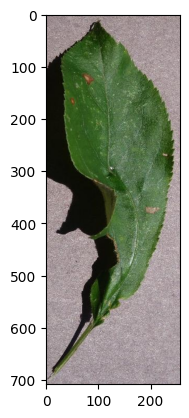

In [17]:
import numpy as np
test_images = images[1:2]

print(len(test_images))

from matplotlib import pyplot as plt

plt.imshow(test_images[0])
plt.show()

In [35]:
%load preprocessing.image_modules.py

ValueError: 'preprocessing.image_modules.py' was not found in history, as a file, url, nor in the user namespace.

In [18]:
from imgaug import augmenters as iaa

resize = iaa.Resize({"height": 128, "width": 128})
rotate = iaa.Affine(rotate=(-360, 360)) 

imgs_aug = []

count = 0
for i in range(len(images)):
    aug = resize(image = images[i])
    aug = rotate(image = aug)
    imgs_aug.append(aug)
    count += 1

    if count % 100 == 0:
        print(str(count) + " images done")

100 images done
200 images done
300 images done
400 images done
500 images done
600 images done
700 images done
800 images done
900 images done
1000 images done
1100 images done
1200 images done
1300 images done
1400 images done
1500 images done
1600 images done
1700 images done
1800 images done
1900 images done


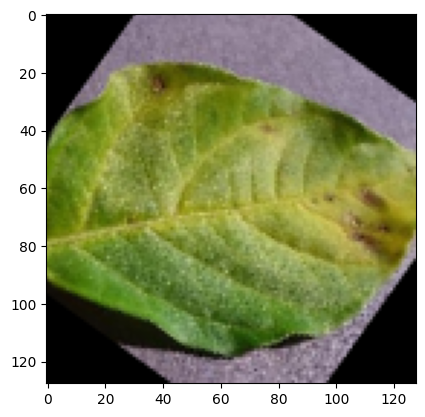

00001847.jpg


In [19]:
plt.imshow(imgs_aug[99])
plt.show()

print(img_names[99])

In [29]:
count = 0

for i in range(len(imgs_aug)):
    prev_name = img_names[i]
    curr_name= prev_name.split('.')[0] + 'R.jpg'
    label = labels_dic[prev_name]
    labels_dic[curr_name] = label
    imageio.imwrite('F:\\FYP\\Initial\\apples augmented\\apples_rotated\\train\\'+curr_name, imgs_aug[i])

    count += 1

    if count % 100 == 0:
        print(str(count) + " images done")



100 images done
200 images done
300 images done
400 images done
500 images done
600 images done
700 images done
800 images done
900 images done
1000 images done
1100 images done
1200 images done
1300 images done
1400 images done
1500 images done
1600 images done
1700 images done
1800 images done
1900 images done


In [31]:
import pandas as pd 

labels = []

for key in labels_dic.keys():
    label = [key, labels_dic[key]]
    labels.append(label)

labels = np.array(labels)

labels  = labels[labels[:,0].argsort()]

df = pd.DataFrame(columns = ['image_name', 'class_id'], data = labels)

df.to_csv(r'F:\FYP\Initial\apples augmented\apples_rotated\train.csv', index=False)